#**DEEP LEARNING FOR COMPUTER VISION**

Select a publicly available image dataset (Recommended 1000-2000 images in total)!

Make groups of 5 people.

Topics to choose:
1. Crowd Counting
2. Object Detection
3. Image Segmentation
4. Image Classification + Attention Map Visualization

- Train a model using Keras/PyTorch
- Evaluate the model
- Present the results in the last meeting

Presentation Outline:
- Problem description
- Method/Model + justification
- Evaluation Method
- Results
- Conclusion

Make a poster that can pack all of the points above! Feel free to use your poster/PPT to present in the final session.

Poster: https://www.canva.com/design/DAGAr1HS2z8/itZDo84iR98CXQvnVdhQHw/edit?utm_content=DAGAr1HS2z8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton.

Bonus points for groups who can train and test at least 3 models and compare them.

Choose a topic max on week 3.

In [21]:
pip install numpy pandas seaborn matplotlib scikit-learn tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Input, layers, models, optimizers
from tensorflow.keras.models import Model, Sequential, load_model

import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [23]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
# raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [24]:
test_csv_path = "C:/Users/user/OneDrive - Bina Nusantara/Documents/UNI/Semester/Sem 4/Deep Learning/Project/Dataset/Testing_set.csv"
test_img_dir = "C:/Users/user/OneDrive - Bina Nusantara/Documents/UNI/Semester/Sem 4/Deep Learning/Project/Dataset/test/"

In [25]:
#read the csv file
data = pd.read_csv(test_csv_path)
data.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [26]:
#add path

data['path'] = test_img_dir + data["filename"]

data.head()

,filename,path
0,Image_1.jpg,C:/Users/user/OneDrive - Bina Nusantara/Docume...
1,Image_2.jpg,C:/Users/user/OneDrive - Bina Nusantara/Docume...
2,Image_3.jpg,C:/Users/user/OneDrive - Bina Nusantara/Docume...
3,Image_4.jpg,C:/Users/user/OneDrive - Bina Nusantara/Docume...
4,Image_5.jpg,C:/Users/user/OneDrive - Bina Nusantara/Docume...


In [27]:
class_names = {0: 'ADONIS', 1: 'AFRICAN GIANT SWALLOWTAIL', 2: 'AMERICAN SNOOT', 3: 'AN 88', 4: 'APPOLLO', 5: 'ATALA', 6: 'BANDED ORANGE HELICONIAN', 7: 'BANDED PEACOCK', 8: 'BECKERS WHITE', 9: 'BLACK HAIRSTREAK', 10: 'BLUE MORPHO', 11: 'BLUE SPOTTED CROW', 12: 'BROWN SIPROETA', 13: 'CABBAGE WHITE', 14: 'CAIRNS BIRDWING', 15: 'CHECQUERED SKIPPER', 16: 'CHESTNUT', 17: 'CLEOPATRA', 18: 'CLODIUS PARNASSIAN', 19: 'CLOUDED SULPHUR', 20: 'COMMON BANDED AWL', 21: 'COMMON WOOD-NYMPH', 22: 'COPPER TAIL', 23: 'CRECENT', 24: 'CRIMSON PATCH', 25: 'DANAID EGGFLY', 26: 'EASTERN COMA', 27: 'EASTERN DAPPLE WHITE', 28: 'EASTERN PINE ELFIN', 29: 'ELBOWED PIERROT', 30: 'GOLD BANDED', 31: 'GREAT EGGFLY', 32: 'GREAT JAY', 33: 'GREEN CELLED CATTLEHEART', 34: 'GREY HAIRSTREAK', 35: 'INDRA SWALLOW', 36: 'IPHICLUS SISTER', 37: 'JULIA', 38: 'LARGE MARBLE', 39: 'MALACHITE', 40: 'MANGROVE SKIPPER', 41: 'MESTRA', 42: 'METALMARK', 43: 'MILBERTS TORTOISESHELL', 44: 'MONARCH', 45: 'MOURNING CLOAK', 46: 'ORANGE OAKLEAF', 47: 'ORANGE TIP', 48: 'ORCHARD SWALLOW', 49: 'PAINTED LADY', 50: 'PAPER KITE', 51: 'PEACOCK', 52: 'PINE WHITE', 53: 'PIPEVINE SWALLOW', 54: 'POPINJAY', 55: 'PURPLE HAIRSTREAK', 56: 'PURPLISH COPPER', 57: 'QUESTION MARK', 58: 'RED ADMIRAL', 59: 'RED CRACKER', 60: 'RED POSTMAN', 61: 'RED SPOTTED PURPLE', 62: 'SCARCE SWALLOW', 63: 'SILVER SPOT SKIPPER', 64: 'SLEEPY ORANGE', 65: 'SOOTYWING', 66: 'SOUTHERN DOGFACE', 67: 'STRAITED QUEEN', 68: 'TROPICAL LEAFWING', 69: 'TWO BARRED FLASHER', 70: 'ULYSES', 71: 'VICEROY', 72: 'WOOD SATYR', 73: 'YELLOW SWALLOW TAIL', 74: 'ZEBRA LONG WING'}
class_names = list(class_names.values())
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

In [28]:
loaded_model = load_model("train_model_mbn.h5")

In [29]:
import os

# Cek direktori kerja saat ini
print(os.getcwd())

# Cek file dalam direktori test
print(os.listdir('C:/Users/user/OneDrive - Bina Nusantara/Documents/UNI/Semester/Sem 4/Deep Learning/Project/Dataset/test/'))


c:\Users\user\OneDrive - Bina Nusantara\Documents\UNI\Semester\Sem 4\Deep Learning\Project\MN Model
['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_1000.jpg', 'Image_1001.jpg', 'Image_1002.jpg', 'Image_1003.jpg', 'Image_1004.jpg', 'Image_1005.jpg', 'Image_1006.jpg', 'Image_1007.jpg', 'Image_1008.jpg', 'Image_1009.jpg', 'Image_101.jpg', 'Image_1010.jpg', 'Image_1011.jpg', 'Image_1012.jpg', 'Image_1013.jpg', 'Image_1014.jpg', 'Image_1015.jpg', 'Image_1016.jpg', 'Image_1017.jpg', 'Image_1018.jpg', 'Image_1019.jpg', 'Image_102.jpg', 'Image_1020.jpg', 'Image_1021.jpg', 'Image_1022.jpg', 'Image_1023.jpg', 'Image_1024.jpg', 'Image_1025.jpg', 'Image_1026.jpg', 'Image_1027.jpg', 'Image_1028.jpg', 'Image_1029.jpg', 'Image_103.jpg', 'Image_1030.jpg', 'Image_1031.jpg', 'Image_1032.jpg', 'Image_1033.jpg', 'Image_1034.jpg', 'Image_1035.jpg', 'Image_1036.jpg', 'Image_1037.jpg', 'Image_1038.jpg', 'Image_1039.jpg', 'Image_104.jpg', 'Image_1040.jpg', 'Image_1041.jpg', 'Image_1042.jpg', 'Image_10

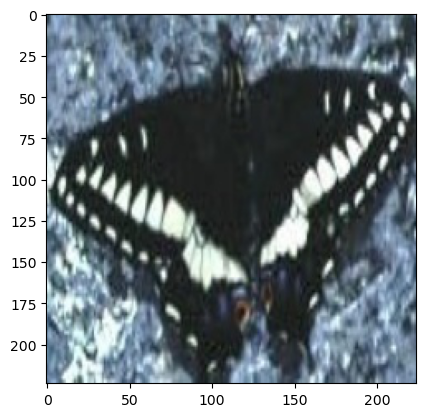

In [30]:
i = 1001
img_path = data['path'][i]

#asumsi 'img_path' sudah terdefinisi dalam code
img = mimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [35]:
#load and pre-process test image
##replace with the actual path
img_path = data['path'][i]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

#rescale pixel values
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis = 0)

In [36]:
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

print("Predicted Class: ", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class:  INDRA SWALLOW


saran dr data:
1. menambah data
2. augmentasi data: kupu2nya dibesarin, di zoom, dimiringin berdasarkan data yang sudah di punya

dr model:
1. merancang arsitektur yang lebih baik
